In [12]:
!pip install gymnasium==1.2.0 vizdoom==1.2.4 pillow==11.3.0

/Users/tripp/miniconda3/envs/ai-agent/lib/python3.12/site-packages/vizdoom/gymnasium_wrapper/base_gymnasium_env.py:84: UserWarning: Detected screen format CRCGCB. Only RGB24 and GRAY8 are supported in the Gymnasium wrapper. Forcing RGB24.
  warnings.warn(


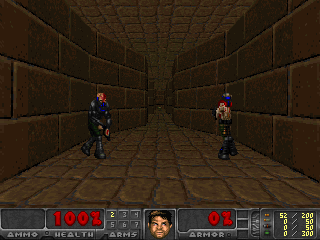

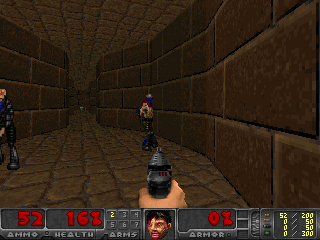

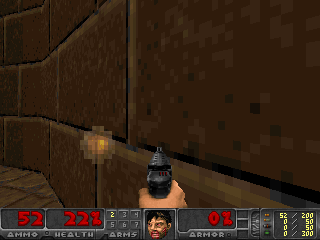

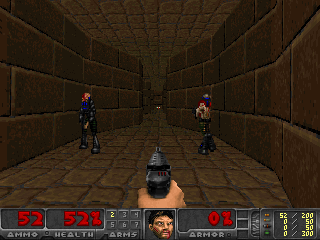

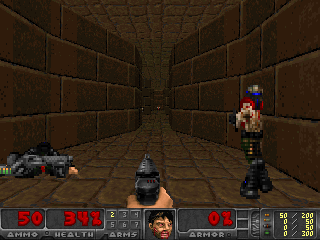

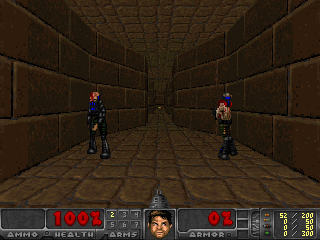

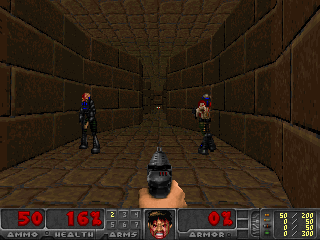

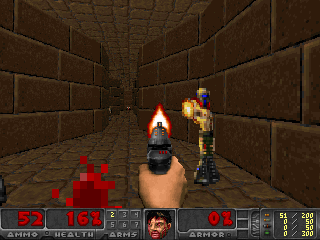

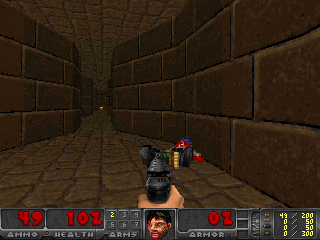

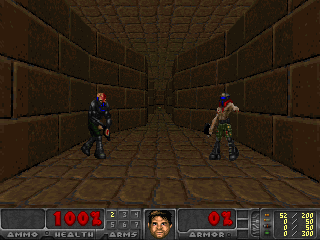

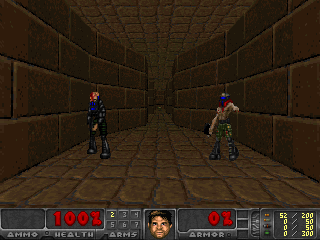

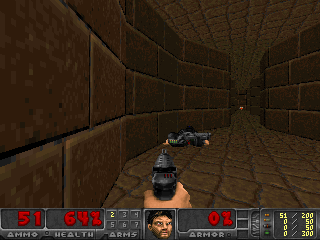

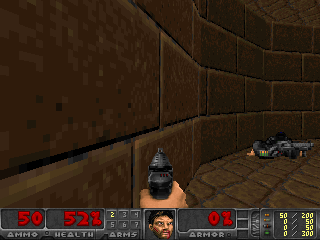

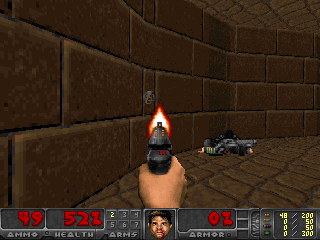

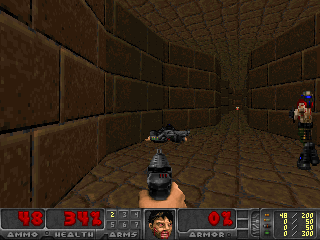

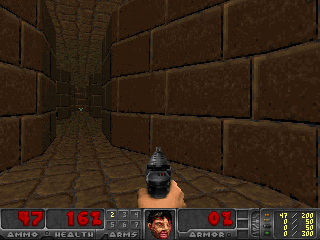

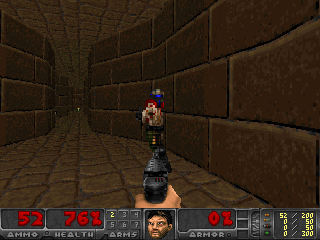

In [7]:
import gymnasium
from vizdoom import gymnasium_wrapper
from PIL import Image
from IPython.display import display


AGENT_FRAME_SKIP = 10
env = gymnasium.make("VizdoomCorridor-v0", frame_skip=AGENT_FRAME_SKIP)
last_frame = None

DISPLAY_FRAME_SKIP = 6


def policy(obs):
   global last_frame
   if last_frame % DISPLAY_FRAME_SKIP == 0:
      screen = obs['screen']
      img = Image.fromarray(screen)
      display(img)
   last_frame += 1
   return env.action_space.sample()

def run_agent():
   global last_frame

   last_frame = 0

   observation, info = env.reset()
   for _ in range(100):
      action = policy(observation)  # this is where you would insert your policy
      observation, reward, terminated, truncated, info = env.step(action)

      if terminated or truncated:
         observation, info = env.reset()

run_agent()
env.close()